In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
data_dev= data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [6]:
Y_train

array([4, 1, 8, ..., 5, 7, 7], dtype=int64)

In [7]:
def init_params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
def ReLU(z):
    return np.maximum(0,z)
def softmax(z):
    A = np.exp(z) / sum(np.exp(z))
    return A

def forward_prop(w1,b1,w2,b2,X):
    z1=w1.dot(X)+b1
    A1= ReLU(z1)
    z2=w2.dot(A1)+b2
    A2=softmax(z2)
    return z1,A1,z2,A2
def ReLU_deriv(z):
    return z>0
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y]= 1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y
def back_prop(z1,A1,z2,A2,w1,w2,X,Y):
    m=Y.size
    one_hot_Y= one_hot(Y)
    dz2=A2-one_hot_Y
    dw2=1/m *dz2.dot(A1.T)
    db2=1/m *np.sum(dz2)
    dz1=w2.T.dot(dz2)*ReLU_deriv(z1)
    dw1=1/m * dz1.dot(X.T)
    db1=1/m * np.sum(dz1)
    return dw1,db1,dw2,db2
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2
    
    
    

In [8]:
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions ==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    w1,b1,w2,b2=init_params()
    for i in range(iterations):
        z1,A1,z2,A2=forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2= back_prop(z1,A1,z2,A2,w1,w2,X,Y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return w1,b1,w2,b2        
    

In [9]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,0.80,8000)

iteration:  0
[5 7 5 ... 0 8 3] [4 1 8 ... 5 7 7]
Accuracy:  0.07221951219512195
iteration:  10
[6 2 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.5610487804878049
iteration:  20
[4 1 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.677439024390244
iteration:  30
[4 2 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.701780487804878
iteration:  40
[4 1 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.7094878048780487
iteration:  50
[4 1 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.7399268292682927
iteration:  60
[4 1 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.7829512195121952
iteration:  70
[4 1 2 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.7863658536585366
iteration:  80
[4 1 8 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.8179756097560975
iteration:  90
[4 1 8 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.8546829268292683
iteration:  100
[4 1 8 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.8525609756097561
iteration:  110
[4 1 8 ... 9 7 7] [4 1 8 ... 5 7 7]
Accuracy:  0.863390243902439
iteration:  120
[4 1 8 ... 9 

In [10]:
def make_predictions(X,w1,b1,w2,b2):
    _,_,_,A2=forward_prop(w1,b1,w2,b2,X)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

Prediction:  [6]
Label:  6


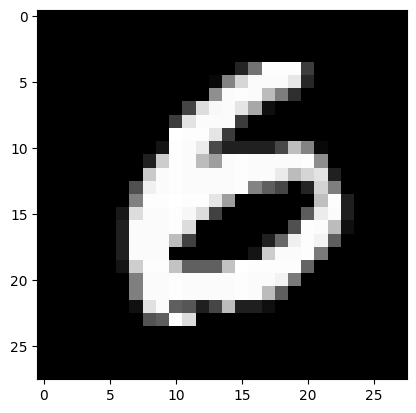

Prediction:  [1]
Label:  1


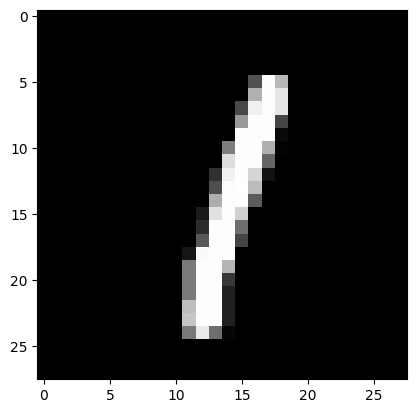

Prediction:  [7]
Label:  7


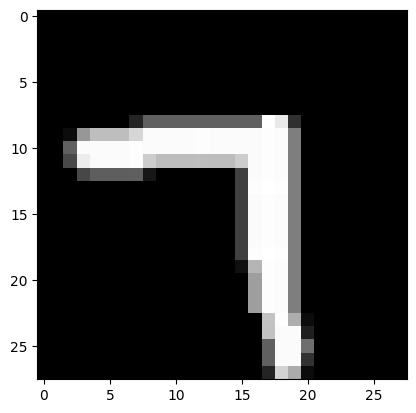

Prediction:  [2]
Label:  2


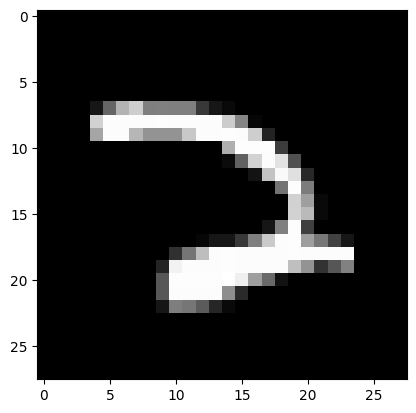

In [11]:
test_prediction(5, w1, b1, w2, b2)
test_prediction(10,w1, b1, w2, b2 )
test_prediction(28,w1, b1, w2, b2 )
test_prediction(32, w1, b1, w2, b2)